In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [25]:
df=pd.read_csv('/content/Metro-Interstate-Traffic-Volume-Encoded.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


In [26]:
df['holiday'].value_counts()

7     48143
3         7
9         6
0         6
6         6
4         6
1         5
10        5
11        5
5         5
2         5
8         5
Name: holiday, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  int64  
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   Year                 48204 non-null  int64  
 5   Month                48204 non-null  int64  
 6   Day                  48204 non-null  int64  
 7   Hour                 48204 non-null  int64  
 8   weather_main         48204 non-null  int64  
 9   weather_description  48204 non-null  int64  
 10  traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 4.0 MB


In [28]:
df.shape

(48204, 11)

In [29]:
df['holiday'].value_counts()

7     48143
3         7
9         6
0         6
6         6
4         6
1         5
10        5
11        5
5         5
2         5
8         5
Name: holiday, dtype: int64

In [30]:
df.describe()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,6.997780,281.258909,0.130851,0.000222,2015.512426,6.506037,15.737636,11.398162,2.578375,16.540536,3259.818355
std,0.139999,12.713613,1.010260,0.008168,1.893211,3.400221,8.722938,6.940238,2.784224,8.970108,1986.860670
min,0.000000,243.390000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,272.160000,0.000000,0.000000,2014.000000,4.000000,8.000000,5.000000,0.000000,10.000000,1193.000000
50%,7.000000,282.450000,0.000000,0.000000,2016.000000,7.000000,16.000000,11.000000,1.000000,17.000000,3380.000000
75%,7.000000,291.806000,0.000000,0.000000,2017.000000,9.000000,23.000000,17.000000,5.000000,27.000000,4933.000000
max,11.000000,310.070000,55.630000,0.510000,2018.000000,12.000000,31.000000,23.000000,10.000000,37.000000,7280.000000


In [31]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

With this information we can conclude that, the traffic ranges from 0 to 7280 cars/vehicles from 2012 to 2018 time period with an average of 3260 cars.
About 25% of the time, there were only 1193 cars or even less than that. It may be during the night time or any road construction work. Whereas about 25% of the time, the traffic volume also increases upto 4933 vehicles or even more.


(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <BarContainer object of 10 artists>)

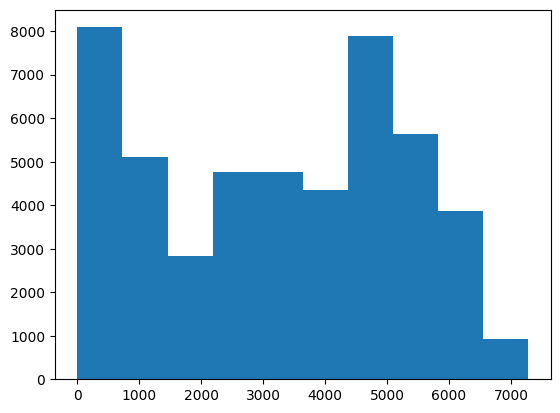

In [32]:
plt.hist(df['traffic_volume'])

# ***Traffic Volume : Day Vs Night***

We can divide our dataset into 2 parts: Day (7 AM to 7 PM) and Night (7 PM to 7 AM)

In [33]:
day=df[((df['Hour']>=7) & (df['Hour']<19))]
night=df[((df['Hour']>=19) | (df['Hour']<7))]
print(day.shape)
print(night.shape)

(23877, 11)
(24327, 11)


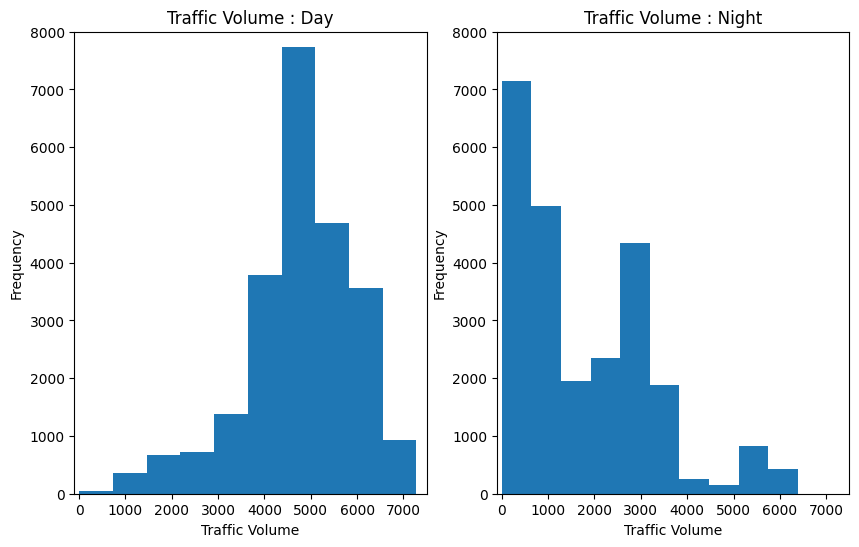

In [34]:
# Day time Graph

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title("Traffic Volume : Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

# Night time Graph

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title("Traffic Volume : Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

In [35]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [36]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

With the day distribution graph, we conclude that the distribution is left skewed, that is generally high during the day time. There are 4252 cars or more passing every hour 75% of the time with a mean of 4762 car in the day time. Also the maximum cars also lie in the daytime dataframe only.

Also from the night distribition, the graph is right skewed which shows that the traffic during the night time is generally light comparatively. 75% of the time, the no of cars passing the station each hour was less than 2819.

So we will only be focusing on the day time traffic as we want to find the traffic indicators.

# ***Time Indicator***

We will now be analyzing the traffic based on a certain month, on a certain day, or at a certain time of the day.


In [37]:
 month_wise=day.groupby('Month').mean()
 month_wise

,holiday,temp,rain_1h,snow_1h,Year,Day,Hour,weather_main,weather_description,traffic_volume
Month,,,,,,,,,,
1,7.0,265.483409,0.015080,0.000631,2015.768036,15.719940,12.386774,2.981964,15.390782,4495.613727
2,7.0,266.956868,0.004019,0.000000,2015.667431,14.443234,12.351491,2.236812,16.588303,4711.198394
3,7.0,273.619940,0.015839,0.000000,2015.735470,16.382944,12.363933,2.291689,17.199891,4889.409560
4,7.0,279.661071,0.105343,0.000000,2015.681467,15.429537,12.492278,2.841699,16.453668,4906.894305
5,7.0,289.282668,0.130863,0.000000,2015.558770,16.268535,12.478300,2.569168,15.905515,4911.121609
6,7.0,294.576068,0.271121,0.000000,2015.875727,15.290323,12.425701,2.695928,14.929138,4898.019566
7,7.0,296.785052,0.288917,0.000000,2015.604289,15.831371,12.388141,1.976871,16.054247,4595.035744
8,7.0,295.119191,0.228113,0.000000,2015.962997,15.785384,12.387604,2.362627,15.765957,4928.302035
9,7.0,292.520287,0.289807,0.000000,2016.147611,15.374128,12.401503,2.482555,16.651100,4870.783145


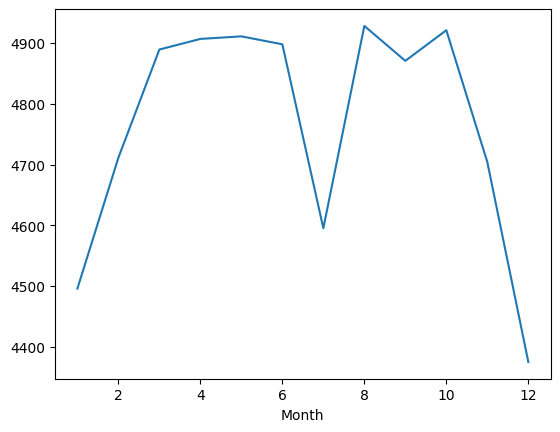

In [38]:
month_wise['traffic_volume'].plot.line()
plt.show()

The traffic is usually less during the winters (November-February) and more intense during the warm months i.e., March-October. But we can also notice that the traffic is very less in the July month.

So we will analyse the July month's traffic for each year.

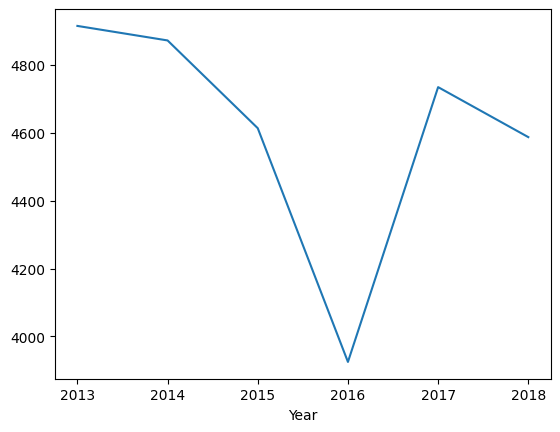

In [39]:
only_july=day[day['Month']==7]
only_july.groupby('Year').mean()['traffic_volume'].plot.line()
plt.show()

There is as much traffic in the July month also as the other warm month. The only exception is year 2016 where the traffic was very less. This may be due the road construction (The hypothesis on road construction in 2016 supports this)

So the traffic is usually higher in all the warm months.

# ***Time Indicators-II***

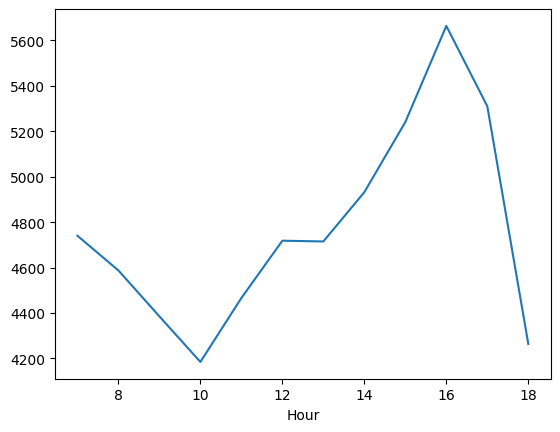

In [40]:
hour_wise=day.groupby('Hour').mean()
hour_wise['traffic_volume'].plot.line()
plt.show()

It shows that the traffic is higher during the daytime only and maximum around 3 PM - 4 PM.

Combining the column to get the time and then fetch the day of the week for day_of_the_week analysis

In [62]:
day.loc[:,"time"] = day['Year'].astype(str) +"/"+ day["Month"].astype(str)+"/"+day['Day'].astype(str)

<ipython-input-62-b40003b665f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day.loc[:,"time"] = day['Year'].astype(str) +"/"+ day["Month"].astype(str)+"/"+day['Day'].astype(str)


In [63]:
day.loc[:,'time']

0        2012/10/2
1        2012/10/2
2        2012/10/2
3        2012/10/2
4        2012/10/2
           ...    
48194    2018/9/30
48195    2018/9/30
48196    2018/9/30
48197    2018/9/30
48198    2018/9/30
Name: time, Length: 23877, dtype: object

In [64]:
day.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume,time
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545,2012/10/2
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516,2012/10/2
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767,2012/10/2
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026,2012/10/2
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918,2012/10/2


In [65]:
day['time'].dtype

dtype('O')

In [ ]:
df['Inserted'] = pd.to_datetime(df['Inserted'], format="%m/%d/%Y, %H:%M:%S")
print(df)

In [75]:
day['time']=pd.to_datetime(day['time'],format="%Y/%m/%d")

<ipython-input-75-21800668b5e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['time']=pd.to_datetime(day['time'],format="%Y/%m/%d")


In [77]:
day.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume,time
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545,2012-10-02
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516,2012-10-02
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767,2012-10-02
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026,2012-10-02
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918,2012-10-02


In [83]:
day['time'].dtype

dtype('<M8[ns]')

In [82]:
day['week']=day['time'].dt.dayofweek

<ipython-input-82-c34b63ccbc95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['week']=day['time'].dt.dayofweek


In [84]:
day.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume,time,week
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545,2012-10-02,1
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516,2012-10-02,1
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767,2012-10-02,1
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026,2012-10-02,1
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918,2012-10-02,1


# ***Time Indicator-III***

<ipython-input-85-ac4080fb1542>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_wise=day.groupby('week').mean()


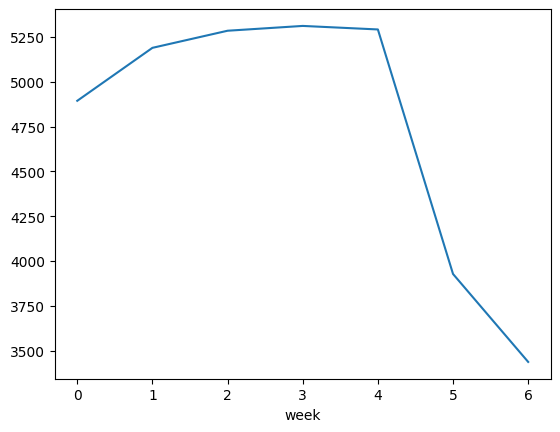

In [85]:
week_wise=day.groupby('week').mean()
week_wise['traffic_volume'].plot.line()
plt.show()

We see that the traffic volume is generally heavier on business day (Monday-Friday) over 5000 and less traffic on weekends below 4000

<ipython-input-86-fe660f4943db>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business=business_days.groupby('Hour').mean()
<ipython-input-86-fe660f4943db>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend=weekend.groupby('Hour').mean()


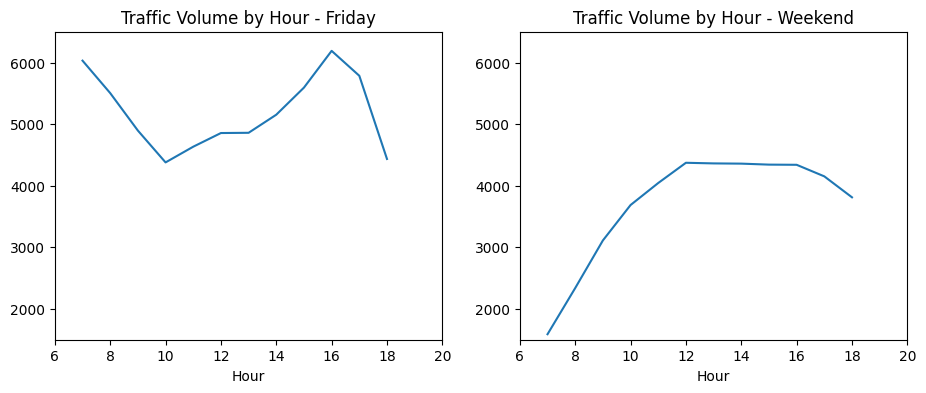

In [86]:
business_days=day.copy()[day['week']<=4]  # 4 is Friday
weekend=day.copy()[day['week']>=5]  # 5 is Saturday

by_hour_business=business_days.groupby('Hour').mean()
by_hour_weekend=weekend.groupby('Hour').mean()

plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume by Hour - Friday')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume by Hour - Weekend')
plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 - whenn most people travel from home to work and back. We see around over 6000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

In [96]:
px.line(by_hour_business['traffic_volume'])

# ***Weather Indicators***

Weather also affect the volume of traffic. In the dataset we have few columns like - rian, snow, weather_description for the analysis of traffic due to weather

In [99]:
day.corr()['traffic_volume']

<ipython-input-99-37e9bfbde064>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



holiday                     NaN
temp                   0.125972
rain_1h               -0.039116
snow_1h                0.001265
Year                  -0.003557
Month                 -0.022337
Day                   -0.011063
Hour                   0.172704
weather_main          -0.072635
weather_description   -0.006052
traffic_volume         1.000000
week                  -0.416453
Name: traffic_volume, dtype: float64

It is clear tha only temperature affects the traffic the most rather than rain or snow.


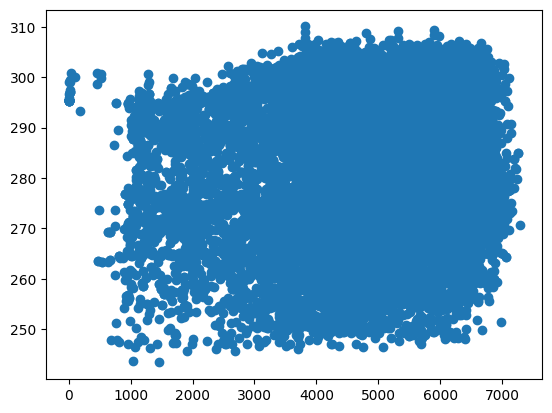

In [101]:
plt.scatter(x=day['traffic_volume'],y=day['temp'])

But from here, the temp seems to be not affecting the traffic too much.

Let's look at other columns - weather_description

# ***Weather Types***

<ipython-input-105-69011a74f381>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



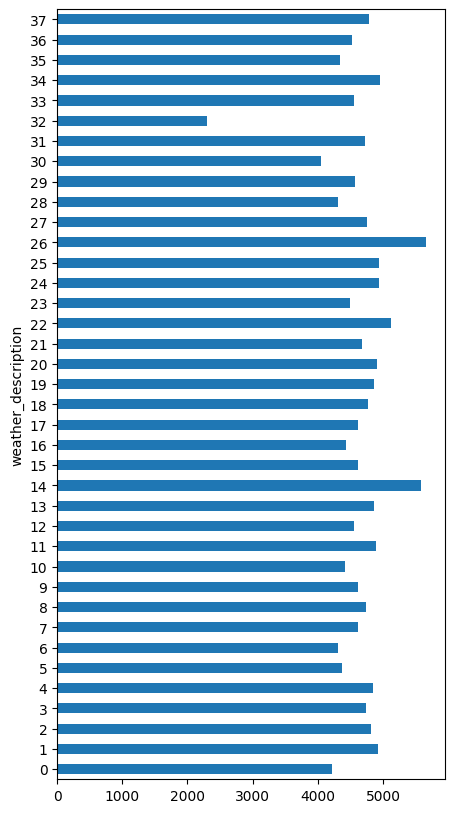

In [105]:
by_weather_description=day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It shows that the weather_description 26 & 14 affects the traffic most (more than 5000 cars).
May be these weathers are - Light rain, snow, Cool Breeze or any other desired weather where would like to take their cars out.

# ***CONCLUSION***

In this Project, we've analyzed few indicators of heavy traffic on the I-944 interstate highway.
We've concluded that:-

--> Time Indicator:
  - The traffic is usually higher during the warm months (March-October) compared to cold months (November-February).
  - The traffic is usually heavier during the business day i.e., Monday to Friday.
  - On business days, the rush hours are aruond 7 and 16.

--> Weather Indicators:
  - Weather_description 14 & 26
